## Random Vs. Biased


# What is Random Sampling?
-- Every population members has an equal chance of selections

1. with replacement: sample have repeated elements.
2. witout replacement: sample have no repeated elements


# What is Sample Bias?

-- Occures when a sample systematically mis-represent the population. Causes are:

1. Non-random selection

2. Self-Selection

   

In [3]:
import pandas as pd
import numpy as np


In [5]:

dataset=pd.read_csv('premier-player-23-24.csv') #loading data set
dataset.head() #displaying top 5

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


In [7]:
#random_sample
random_sample= dataset.sample(n=50,replace=False) #taking sample without replacement
sample_mean_goal_scored1=random_sample['Gls'].mean() #evaluating mean
print(f"Randomly selected player average goal per season: {sample_mean_goal_scored1:.2f}")

Randomly selected player average goal per season: 2.40


In [9]:
#Biased_sample
biased_sample= dataset[dataset['Pos']=='GK'].sample(n=50,replace=True) #taking sample with replacement
sample_mean_goal_scored2=biased_sample['Gls'].mean() #evaliating mean
print(f"Biased Selected player average goal per season{sample_mean_goal_scored2:.2f}")

Biased Selected player average goal per season0.00


# Observations

In random sampling we selected, Random 50 different players of different positions. Where as In Biased sample we alter the sampling process by only taking player who plays at are Goalkeeper(GK). So there is very few chances scoring goals by GK. Taking Assumption and Considering Biased sample as our our correct appoarch will lead us to sytematical error.

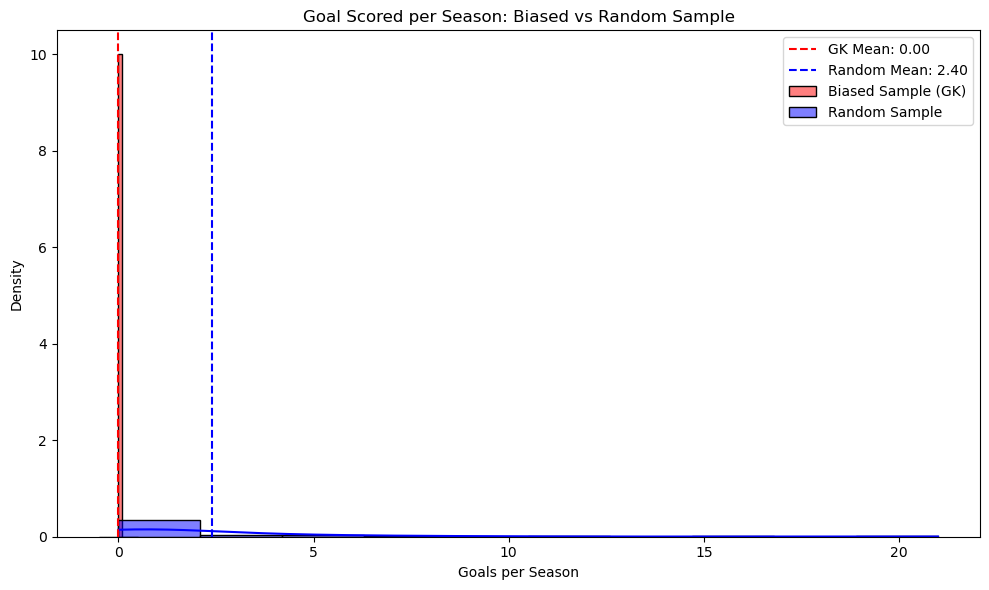

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms for biased and random samples
plt.figure(figsize=(10, 6))

sns.histplot(biased_sample['Gls'],kde=True,color='red',label='Biased Sample (GK)',stat='density',bins=10)
sns.histplot(random_sample['Gls'],kde=True, color='blue',label='Random Sample',stat='density',bins=10)

# Add vertical lines for mean comparison
plt.axvline(sample_mean_goal_scored2,color='red',linestyle='--',label=f'GK Mean: {sample_mean_goal_scored2:.2f}')
plt.axvline(sample_mean_goal_scored1,color='blue',linestyle='--',label=f'Random Mean: {sample_mean_goal_scored1:.2f}')

# Labels and title
plt.title('Goal Scored per Season: Biased vs Random Sample')
plt.xlabel('Goals per Season')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('C:/project/draft/Statistics_Project/Sampling_Bias_and_Mean_Reversion_in_Football_Analytics/visuals/Biased_Vs_Random_sample.png')
plt.show()
